In [4]:
import pandas as pd
import phate
import scprep
import scanpy as sc
import anndata

# matplotlib settings for Jupyter notebooks only
%matplotlib inline
DATA_PATH = '/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/sea_ad/data/'

In [5]:
adata = sc.read_h5ad(DATA_PATH + 'merfish_used_in_analysis_subset.h5ad')

In [21]:
# PHATE
phate_op_preproc = phate.PHATE()
X_phate = phate_op_preproc.fit_transform(adata[:,:].X)
adata.obsm['X_phate'] = X_phate

Calculating PHATE...
  Running PHATE on 12000 observations and 180 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


    Calculated PCA in 1.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 26.83 seconds.
    Calculating affinities...
    Calculated affinities in 5.19 seconds.
  Calculated graph and diffusion operator in 33.91 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.42 seconds.
    Calculating KMeans...
    Calculated KMeans in 7.99 seconds.
  Calculated landmark operator in 10.59 seconds.
  Calculating optimal t...
    Automatically selected t = 39
  Calculated optimal t in 5.46 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 3.05 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.42 seconds.
Calculated PHATE in 58.44 seconds.


In [14]:
sc.tl.pca(adata, svd_solver='arpack')

<Axes: title={'center': 'PHATE'}, xlabel='PHATE1', ylabel='PHATE2'>

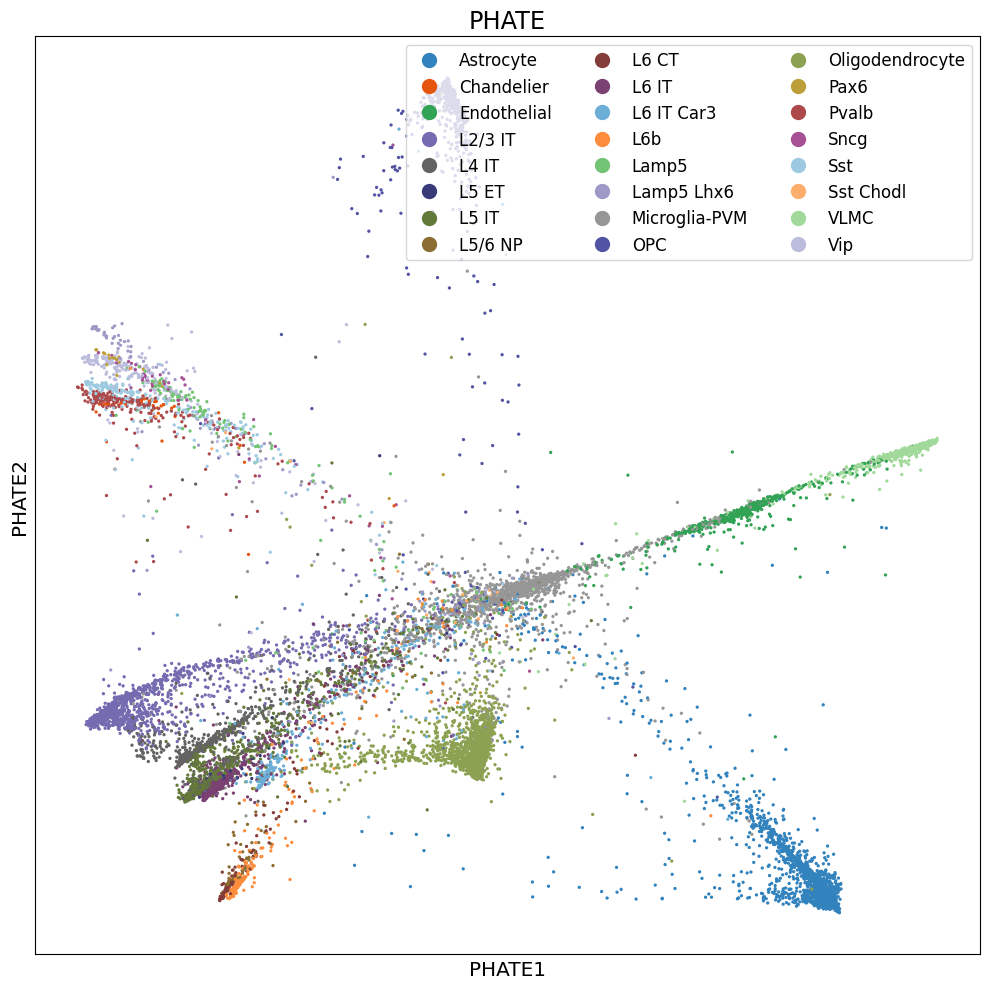

In [22]:
scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['Subclass'], figsize=(10,10), ticks=False, label_prefix='PHATE', title='PHATE')

In [23]:
# PHATE
phate_op_pca = phate.PHATE()
X_phate_pca = phate_op_pca.fit_transform(adata.obsm['X_pca'])
adata.obsm['X_phate_pca'] = X_phate_pca

Calculating PHATE...
  Running PHATE on 12000 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 8.66 seconds.
    Calculating affinities...
    Calculated affinities in 0.25 seconds.
  Calculated graph and diffusion operator in 8.94 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.24 seconds.
    Calculating KMeans...
    Calculated KMeans in 15.19 seconds.
  Calculated landmark operator in 17.56 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 5.50 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.56 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.54 seconds.
Calculated PHATE in 39.11 seconds.


<Axes: title={'center': 'PHATE'}, xlabel='PHATE1', ylabel='PHATE2'>

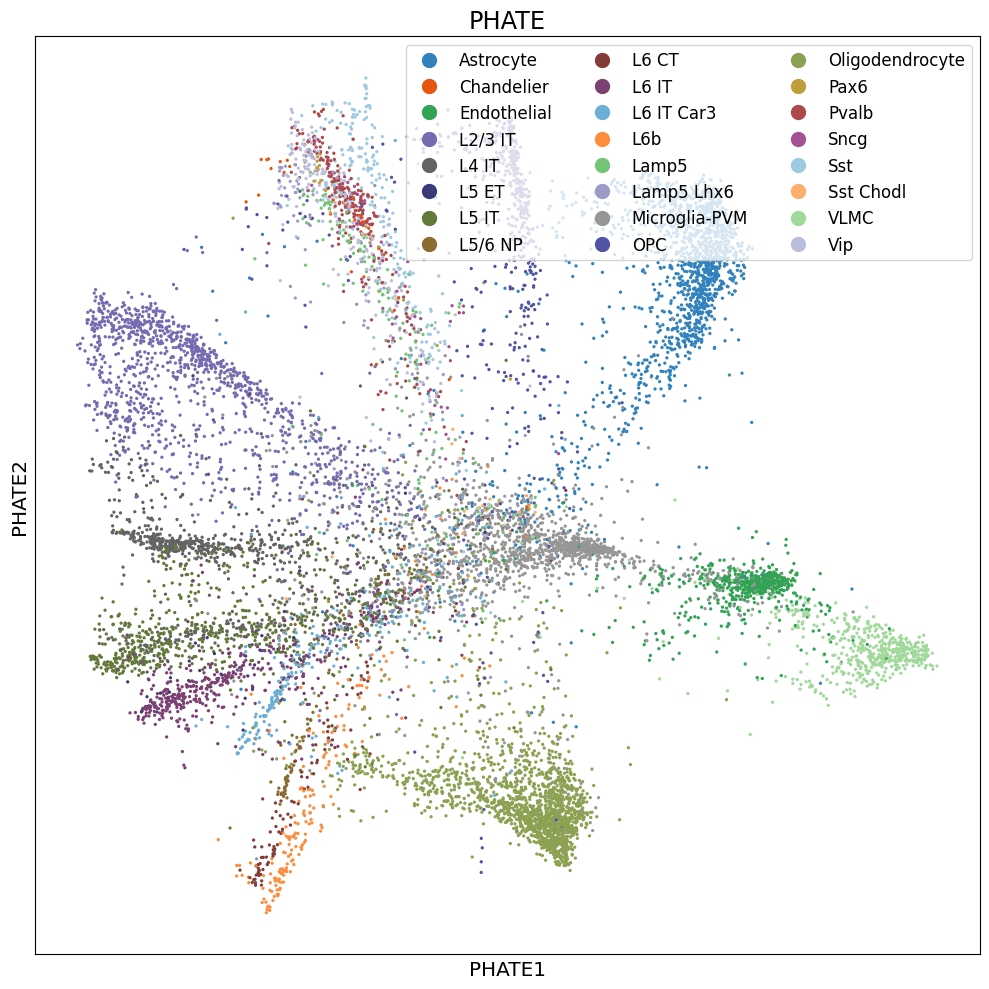

In [24]:
scprep.plot.scatter2d(adata.obsm['X_phate_pca'], c=adata.obs['Subclass'], figsize=(10,10), ticks=False, label_prefix='PHATE', title='PHATE')

In [25]:
adata.write_h5ad('../data/sea_ad_merfish_used_in_analysis_subset12000.h5ad')